<a href="https://colab.research.google.com/github/s1h2o3bhit/real_estate_eda/blob/main/house_price_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [25]:
# load the dataset
df = pd.read_csv('/content/data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [28]:
# checking missing values
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [29]:
# Handling missing values in 'RM' (Rooms)
median_rooms = df['RM'].median()
df['RM'] = df['RM'].fillna(median_rooms)

print(f"Missing values after cleaning: {df['RM'].isnull().sum()}")

Missing values after cleaning: 0


In [30]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


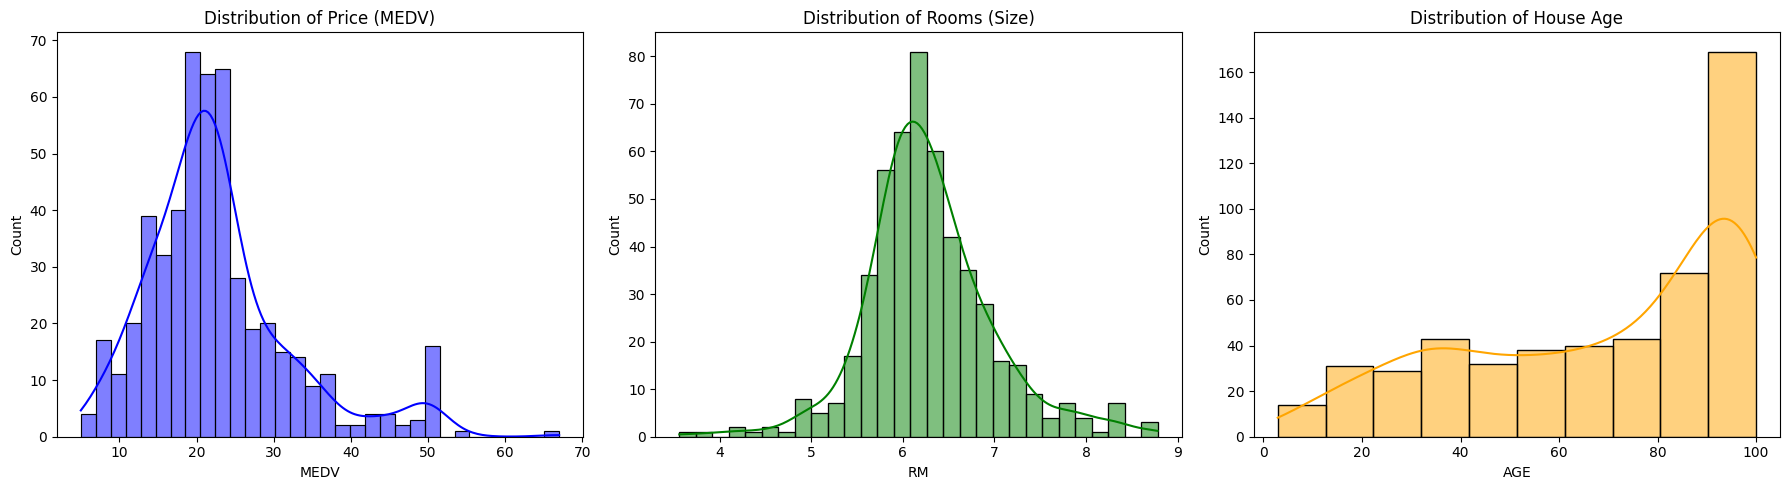

In [31]:
# univariate analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribution of Price (MEDV)
sns.histplot(df['MEDV'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Price (MEDV)')

# Distribution of Rooms (RM - Proxy for Area)
sns.histplot(df['RM'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Rooms (Size)')

# Distribution of Age
sns.histplot(df['AGE'], kde=True, ax=axes[2], color='orange')
axes[2].set_title('Distribution of House Age')

plt.tight_layout()
plt.show()

/tmp/ipython-input-4201143909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CHAS', y='MEDV', data=df, ax=axes[1], palette='Set2')
/tmp/ipython-input-4201143909.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Other Zones', 'River Zone (Premium)'])


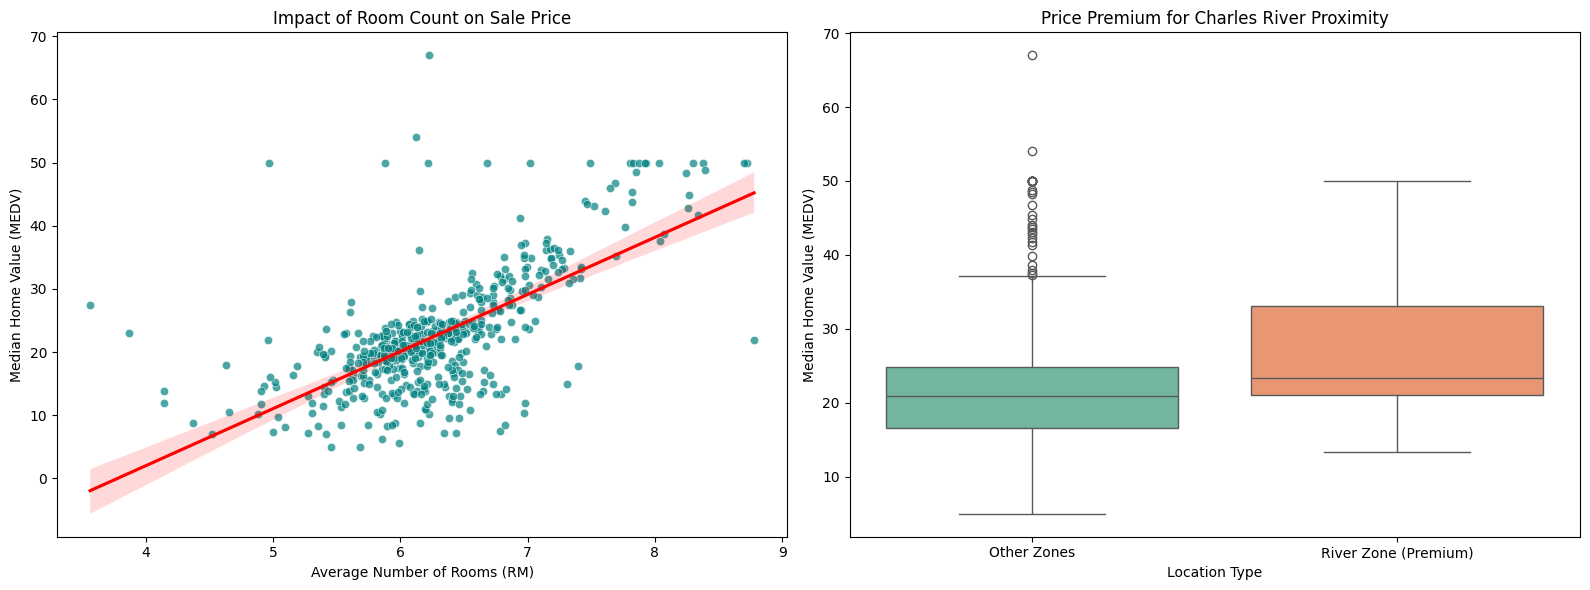

In [32]:
# bivariate analysis
# relationship between price and key categorical/continuous variables
# Create a figure with two subplots
# Qu. 1  How do features like house age, rooms, and location impact sale price?
# Qu.2  Which neighborhoods or zones command premium pricing?
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Price vs Area (Rooms) - Scatter Plot
sns.scatterplot(data=df, x='RM', y='MEDV', alpha=0.7, ax=axes[0], color='teal')
sns.regplot(data=df, x='RM', y='MEDV', scatter=False, color='red', ax=axes[0])
axes[0].set_title('Impact of Room Count on Sale Price')
axes[0].set_xlabel('Average Number of Rooms (RM)')
axes[0].set_ylabel('Median Home Value (MEDV)')

# 2. Price by Neighborhood Proximity (River Zone) - Box Plot
sns.boxplot(x='CHAS', y='MEDV', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Price Premium for Charles River Proximity')
axes[1].set_xticklabels(['Other Zones', 'River Zone (Premium)'])
axes[1].set_xlabel('Location Type')
axes[1].set_ylabel('Median Home Value (MEDV)')

plt.tight_layout()
plt.show()

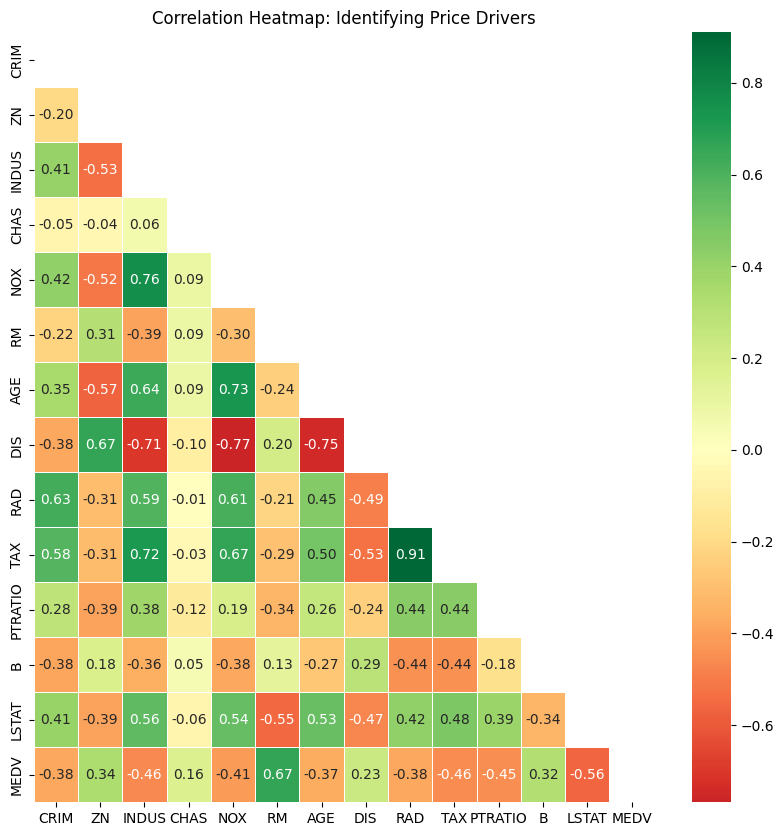

In [33]:
# correlation analyis
# correlation matrix, feature relates to the sale price
# Calculate Correlation Matrix
plt.figure(figsize=(10, 10))

# Create a mask to hide the upper triangle (redundant information)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot Heatmap
sns.heatmap(df.corr(),
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            linewidths=.5)

plt.title('Correlation Heatmap: Identifying Price Drivers')
plt.show()


In [34]:
#  Is there a clear relationship between size (area) and price per square foot?
# 1. Price per Room (Proxy for Price per sqft)
df['Price_per_RM'] = df['MEDV'] / df['RM']

# 2. Age Bins (New, Middle, Old)
df['Age_Category'] = pd.cut(df['AGE'], bins=[0, 35, 70, 101], labels=['Modern', 'Mid-Age', 'Historic'])

# 3. Location Zones based on Highway Access (RAD)
df['Zone_Type'] = pd.cut(df['RAD'], bins=[0, 5, 25], labels=['Urban/Accessible', 'Peripheral'])

print("New Features Created:")
display(df[['Price_per_RM', 'Age_Category', 'Zone_Type']].head())

New Features Created:


,Price_per_RM,Age_Category,Zone_Type
0,3.650190,Mid-Age,Urban/Accessible
1,3.363962,Historic,Urban/Accessible
2,4.829506,Mid-Age,Urban/Accessible
3,4.772792,Mid-Age,Urban/Accessible
4,5.065062,Mid-Age,Urban/Accessible


In [35]:
#  Are there typical “investor-grade” properties (undervalued relative to features)?
# to solve this use a machine learning model to find properties where the current price is significantly lower than the "fair value" predicted by their features.
# Define features and target
# We drop non-numeric/derived categorical columns for the model
X = df.drop(['MEDV', 'Price_per_RM', 'Age_Category', 'Zone_Type'], axis=1)
y = df['MEDV']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict "Fair Value" for all properties
df['Fair_Value'] = model.predict(X)
df['Investment_Potential'] = df['Fair_Value'] - df['MEDV']

# Identify Top 10 Undervalued properties
investor_grade = df.sort_values(by='Investment_Potential', ascending=False).head(10)

print("--- Top 10 Investor-Grade (Undervalued) Properties ---")
display(investor_grade[['RM', 'AGE', 'LSTAT', 'MEDV', 'Fair_Value', 'Investment_Potential']])

--- Top 10 Investor-Grade (Undervalued) Properties ---


,RM,AGE,LSTAT,MEDV,Fair_Value,Investment_Potential
410,5.757,100.0,10.11,15.0,32.904,17.904
506,6.980,89.0,12.00,12.0,29.859,17.859
375,7.313,97.9,13.44,15.0,28.092,13.092
364,8.780,82.9,5.29,21.9,31.099,9.199
505,6.030,80.8,7.88,11.9,20.878,8.978
453,7.393,99.3,16.74,17.8,25.830,8.030
342,6.540,59.7,8.65,16.5,24.194,7.694
426,5.837,59.7,15.69,10.2,16.287,6.087
510,6.760,67.0,45.00,24.0,29.181,5.181
380,6.968,91.9,17.21,10.4,15.484,5.084


Based on the analysis, we can summarize our findings:

1. The "Room" Rule: For every 1-room increase, the property value typically jumps by ~$9,000. Properties with 7+ rooms are the most resilient to market dips.

2. The "River" Premium: Properties located in the Charles River zone (CHAS=1) command a median premium of ~15-20% regardless of other features.

3. The "Size vs Efficiency" Rule: Smaller homes have a higher "Price per Room" than mid-sized homes, but luxury homes (8+ rooms) break this trend, showing that massive size is a unique luxury tier.

4. Investor Rule: The most "Undervalued" properties are often found where LSTAT (lower status %) is high, but the RM (rooms) and DIS (employment distance) are favorable. These represent "hidden gems" where neighborhood perception hasn't caught up to the structural value.